# Group Members
Anthony Marcozzi
Haggin Hubert
Claire Gilder

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Eigenfaces

A classic result in Principal Component Analysis comes from applying PCA to images of faces: the principal components that result from this process are known as eigenfaces, and they represent the optimal basis by which to represent faces.  

We'll perform this analysis on the labelled faces in the wild dataset.  To get this dataset, use the following commands.  Note that this will likely take a few minutes the first time, as the dataset is nearly 200MB.


In [1]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4,color=False)

The resulting dataset will be a dictionary.  Inside the dictionary there is a field called 'data', which is an m by 1850 numpy array.  This is just a flattened image, as with MNIST.  To reshape it to a proper black and white face image, you can reshape to 50 by 37.  Try this with a few of these images and plot them using imshow (you may wish to switch to grayscale).  NOTE: The LFW dataset pixel values are scaled from 0-255.  You'll need to rescale these to 0-1 by dividing by 255.  

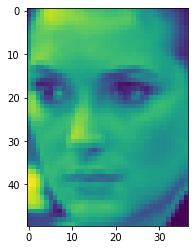

<class 'numpy.ndarray'> (3023, 1850)


In [14]:
data = lfw_people["data"]
data /= 255
m = data.shape[0]
plt.imshow(data[0, :].reshape(50, 37))
plt.show()
print(type(data), data.shape)

Now, perform a principal component analysis on this dataset.  If we call the m by 1850 matrix of faces $X$, then the first step is to center the data as
$$X' = X - \bar{X},$$
with $\bar{X}$ the pixelwise mean of the data (as such, $\bar{X}$ should be size 1 by 1850).  


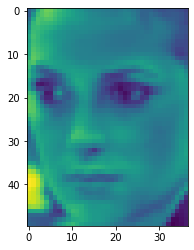

In [25]:
x_bar = data.mean(axis=0)
x_prime = data - x_bar
plt.imshow(x_prime[0, :].reshape(50, 37))
# plt.imshow(x_bar.reshape(50, 37))

Next we can easily compute the covariance matrix as 
$$ S = \frac{1}{m} X'^T X',$$
which should have dimensions 1850 by 1850.

In [26]:
S = (1/m) * np.transpose(x_prime) @ x_prime
print(S.shape)

(1850, 1850)


Now, we can compute the principal components and their scores by taking an eigenvalue decomposition of $S$.  You can use the numpy command linalg.eig(S) to do this.  It may take a few moments to run, as this is cubic in the size of $S$!

In [27]:
import numpy as np
lamda,V = np.linalg.eig(S)

Next, plot the eigenvalues $\lambda$.  You should find that they rapidly decrease in size (you may want to use a logarithmic $y$ axis).  Come up with some means to select a value $p$ after which you truncate.  Create a matrix $V'$ that contains as its columns the first $p$ principal components.   

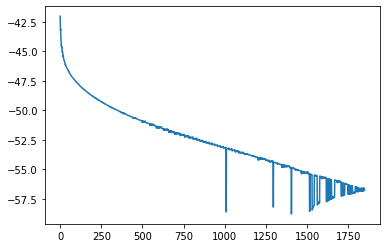

In [32]:
plt.plot(np.log(lamda))
plt.show()
p = 100

The principal components are of an appropriate size that they can be reshaped into images.  Visualize a few principal components (perhaps the first, second, tenth, hundredth, etc.).  These are the so-called eigenfaces: if you add them up in various proportions, you can recover nearly any face.  

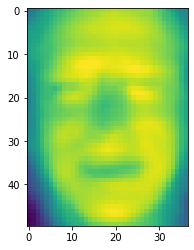

In [53]:
V_prime = V[:, :p]
plt.imshow(V[:, 0].reshape(50, 37))
plt.show()

Finally, let's explore the effects of truncation.  First, transform the data into its PCA coordinates by using the formula
$$ Z = X' V'.$$
$Z$ is an $m$ by $p$ matrix.  It contains the coordinates of each face, but now represented as coefficients of this new and better basis.  It's also lower dimensional, since $p<1850$.  As such, we've lost some information.  To get a sense of how much information was lost, we can transform $Z$ back into the original data coordinates using
$$
X_{recon} = Z V'^T + \bar{X}.
$$
Plot a few images from $X_{recon}$ alongside the equivalent original $X$.  Comment on how good the reconstruction is.    

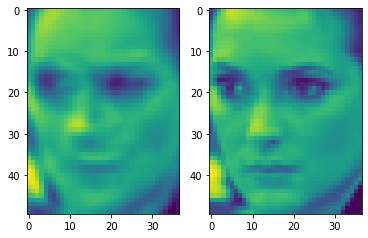

In [56]:
Z = x_prime @ V_prime
x_recon = Z @ V_prime.T + x_bar
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_recon[0, :].reshape(50, 37))
ax[1].imshow(data[0, :].reshape(50, 37))
plt.show()

Finally, repeat the above procedure for different values of $p$.  For example, $p=1, p=5, p=20, etc.$.  How does the quality of the reconstruction change with different $p$?

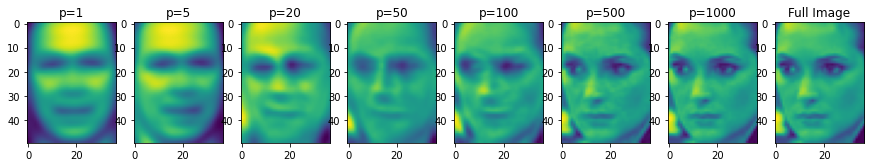

In [66]:
fig, ax = plt.subplots(1, 8, figsize=(15,8))
p_values = [1, 5, 20, 50, 100, 500, 1000]
for i in range(len(p_values)):
    p = p_values[i]
    V_prime = V[:, :p]
    Z = x_prime @ V_prime
    x_recon = Z @ V_prime.T + x_bar
    ax[i].imshow(x_recon[0, :].reshape(50, 37))
    ax[i].set_title(f'p={p}')
ax[7].imshow(data[0, :].reshape(50, 37))
ax[7].set_title('Full Image')
plt.show()

BONUS ROUND: Repeat the above procedure, but in color.  You can get the color LFW dataset by simply setting the color flag to true in fetch_lfw_people.

In [78]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4,color=True)

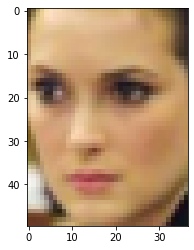

In [79]:
data = lfw_people["data"]
data /= 255
plt.imshow(data[0, :].reshape(50, 37, 3))
plt.show()

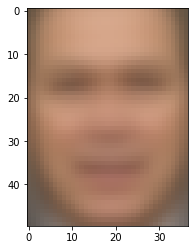

In [81]:
x_bar = data.mean(axis=0)
x_prime = data - x_bar
plt.imshow(x_bar.reshape(50, 37, 3))
plt.show()

In [84]:
S = (1/m) * np.transpose(x_prime) @ x_prime
lamda,V = np.linalg.eig(S)

/Users/anthony/CompSci/UMontana/2021_Fall/CS547-ML/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


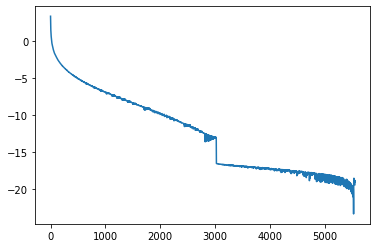

In [85]:
plt.plot(np.log(lamda))
plt.show()
p = 100

In [89]:
V = V.astype(np.float64)
V_prime = V[:, :p]
Z = x_prime @ V_prime
x_recon = Z @ V_prime.T + x_bar

/Users/anthony/CompSci/UMontana/2021_Fall/CS547-ML/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


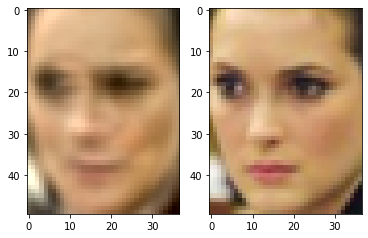

In [90]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_recon[0, :].reshape(50, 37, 3))
ax[1].imshow(data[0, :].reshape(50, 37, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


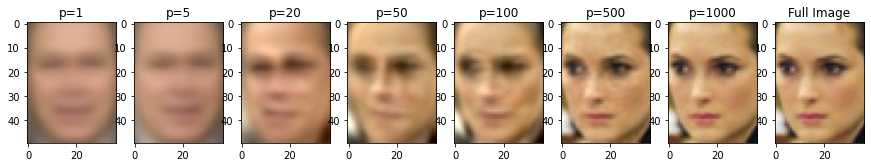

In [91]:
fig, ax = plt.subplots(1, 8, figsize=(15,8))
p_values = [1, 5, 20, 50, 100, 500, 1000]
for i in range(len(p_values)):
    p = p_values[i]
    V_prime = V[:, :p]
    Z = x_prime @ V_prime
    x_recon = Z @ V_prime.T + x_bar
    ax[i].imshow(x_recon[0, :].reshape(50, 37, 3))
    ax[i].set_title(f'p={p}')
ax[7].imshow(data[0, :].reshape(50, 37, 3))
ax[7].set_title('Full Image')
plt.show()